In [1]:
#Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,f1_score,precision_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading the dataset
df=pd.read_csv('C:/Users/User/Documents/Data Trained/IBM_HR_Attrition_Rate_Analytics-master/HR_Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
#Checking the null values(if any)
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

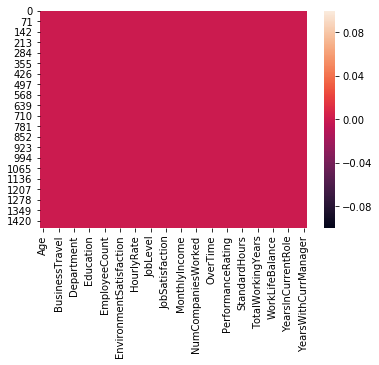

In [9]:
sns.heatmap(df.isnull())
plt.show()

In [10]:
#Statistical Summary of the Data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
#We can drop employee number as it is not that much importance
df.drop(columns=["EmployeeNumber"],inplace=True)

In [12]:
df["Over18"].unique()

array(['Y'], dtype=object)

In [13]:
#hence we can drop over18 column
df.drop(columns=["Over18"],inplace=True)

In [14]:
df.shape

(1470, 33)

In [15]:
#As there are many columns we can group them
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
        'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'OverTime'],
       dtype='object')}

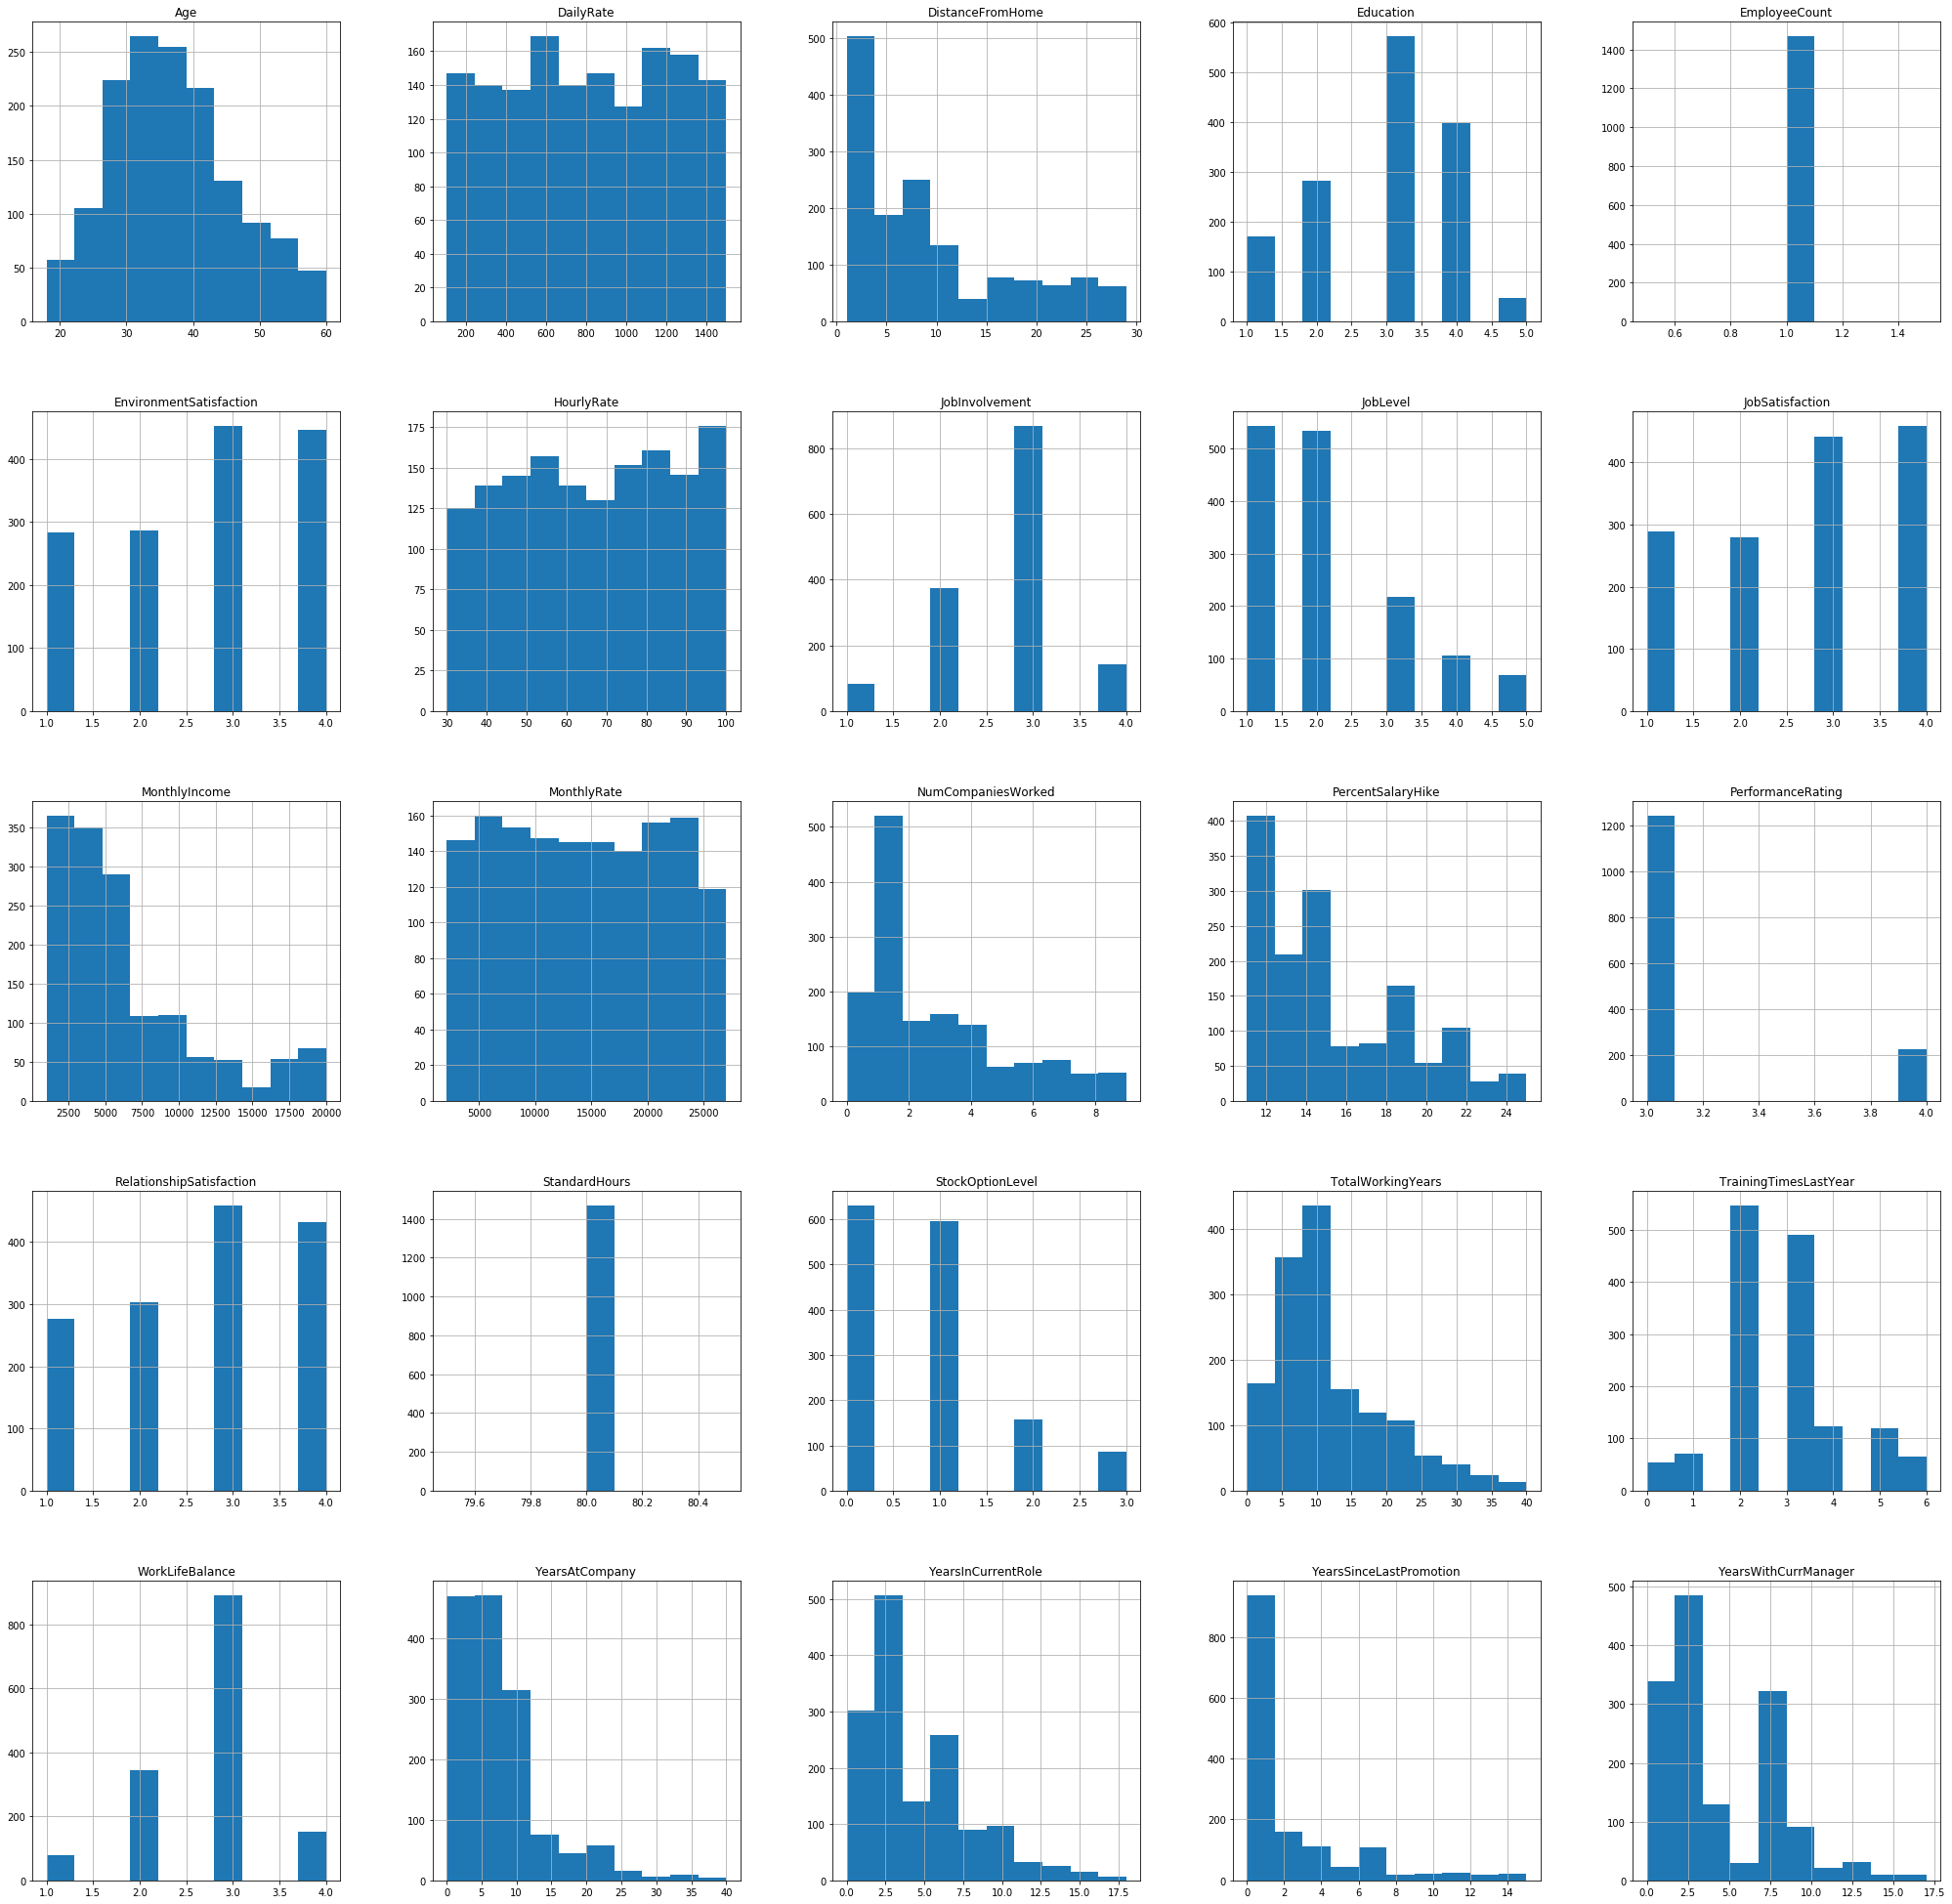

In [16]:
#Univariate Analysis
df.hist(figsize=(35,35))
plt.show()

In [17]:
df_int = df[['Age','DailyRate','DistanceFromHome', 'Education', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome','EmployeeCount',
                        'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating', 
                       'RelationshipSatisfaction', 'StockOptionLevel','StandardHours',
                       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                       'YearsWithCurrManager']].copy()

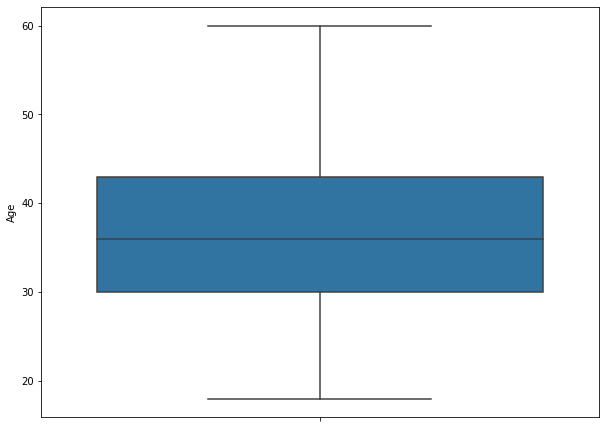

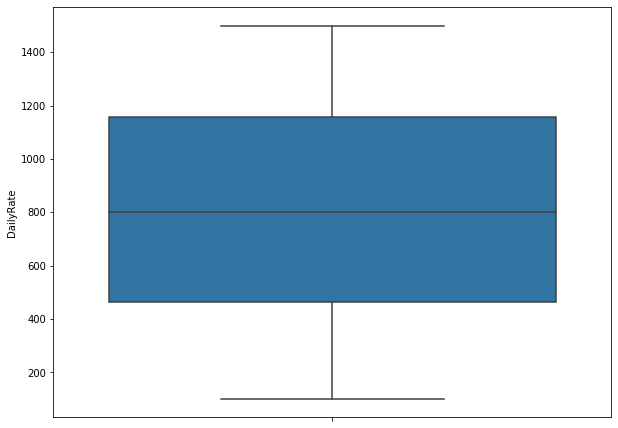

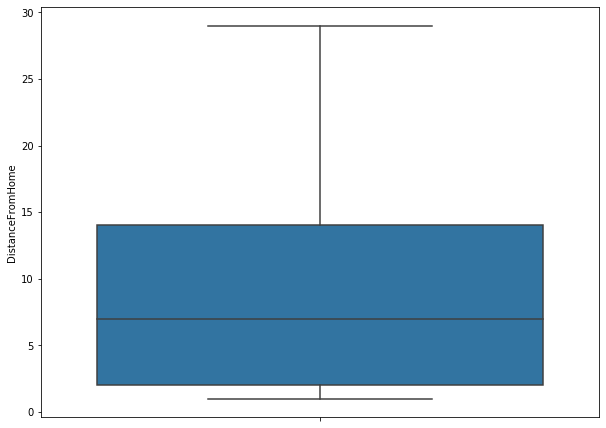

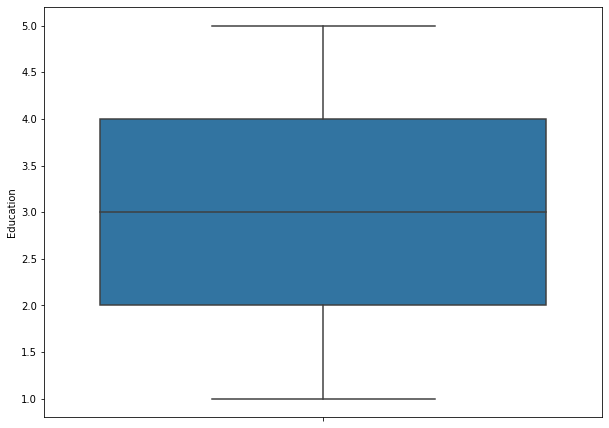

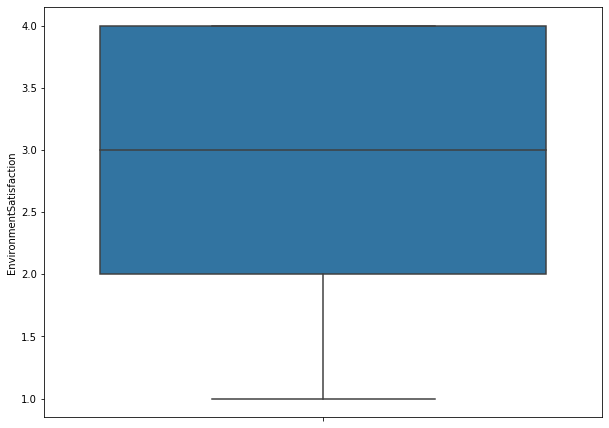

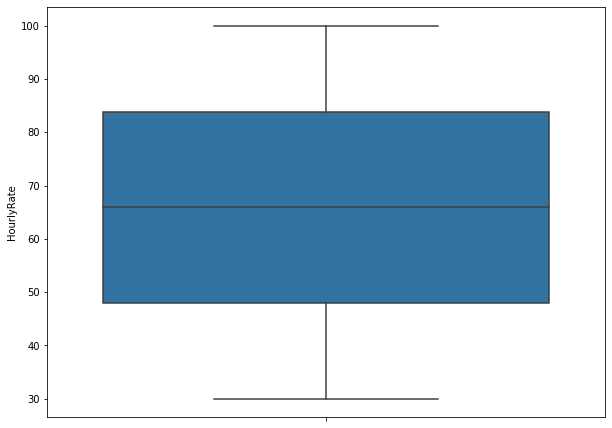

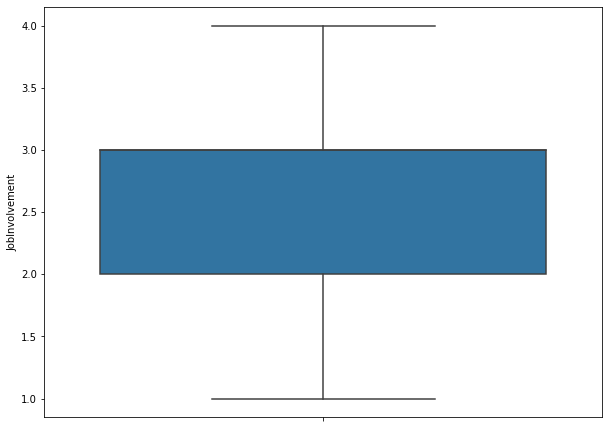

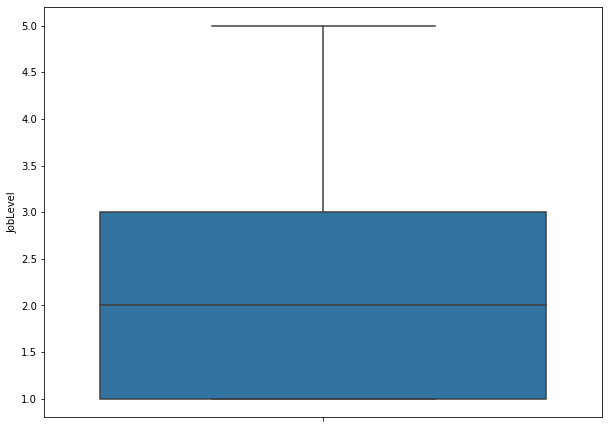

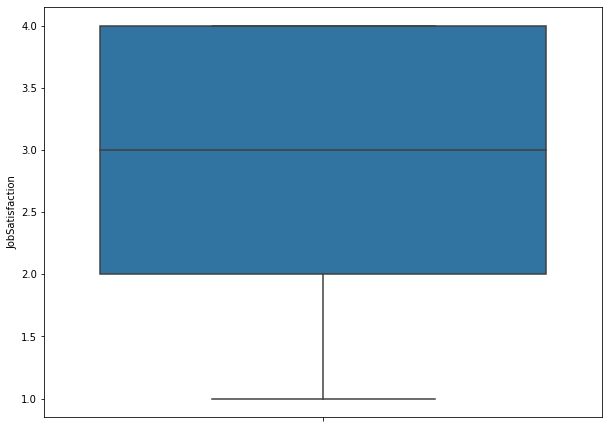

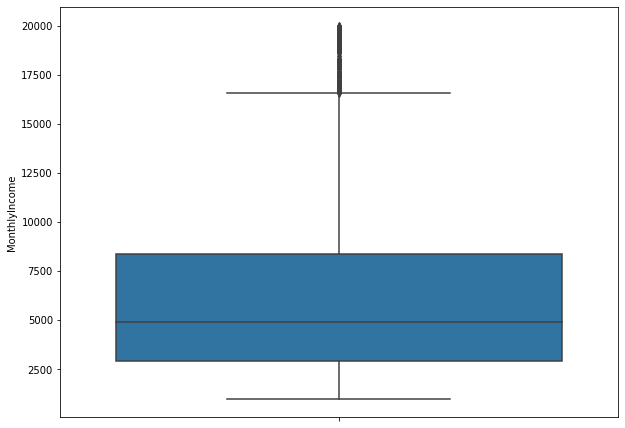

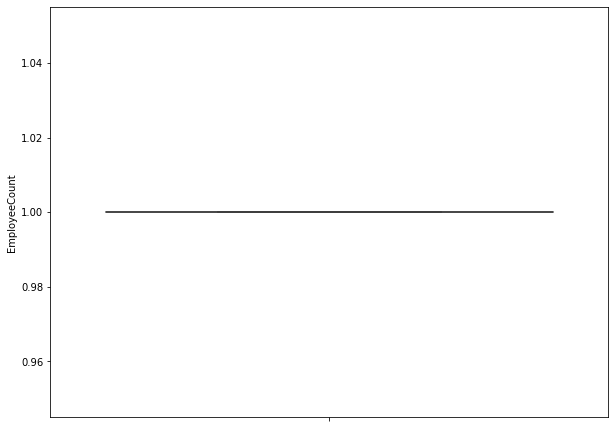

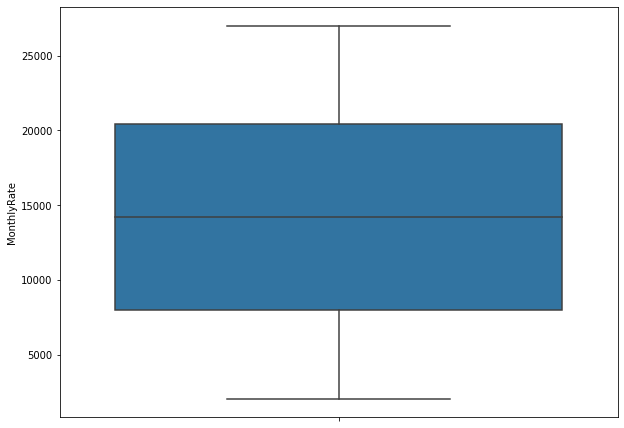

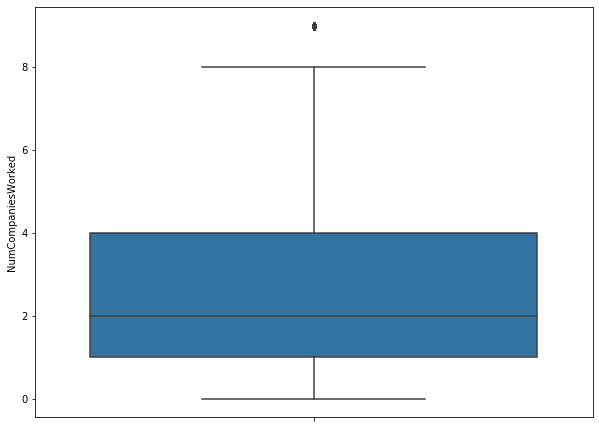

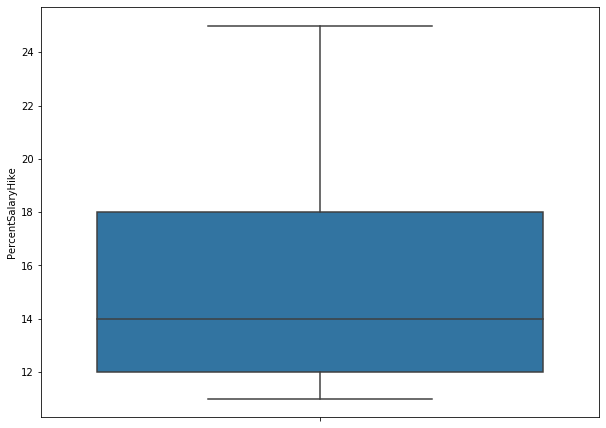

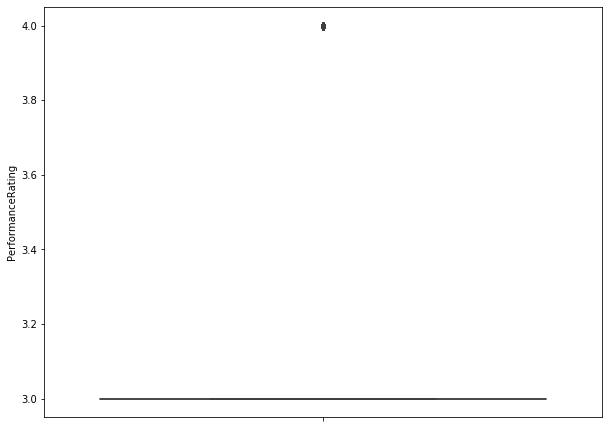

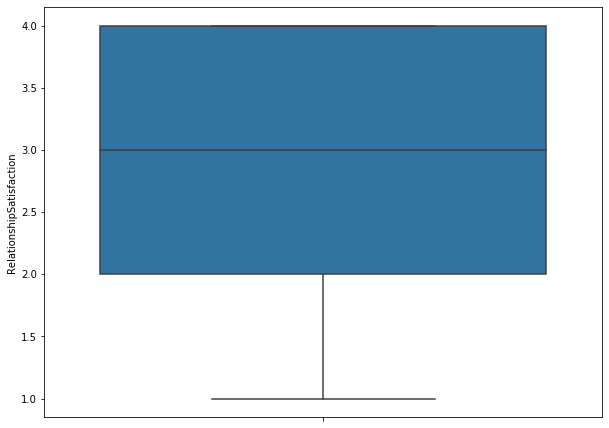

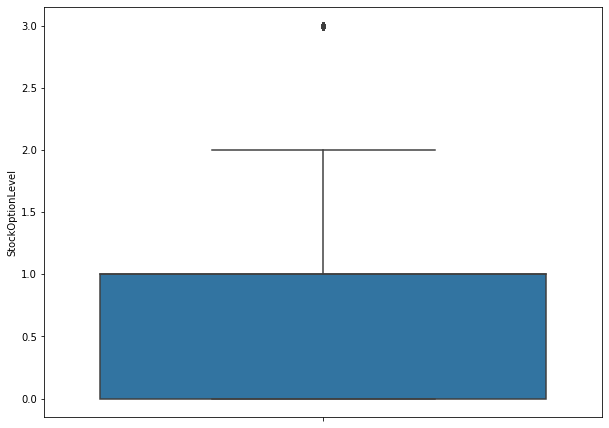

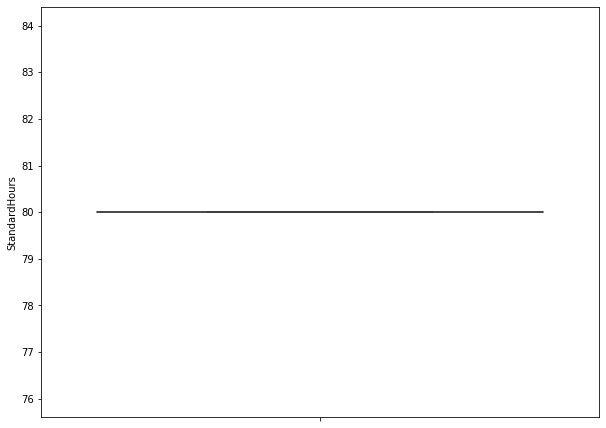

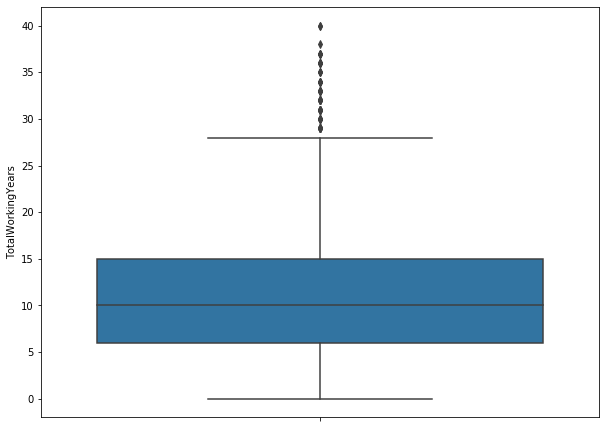

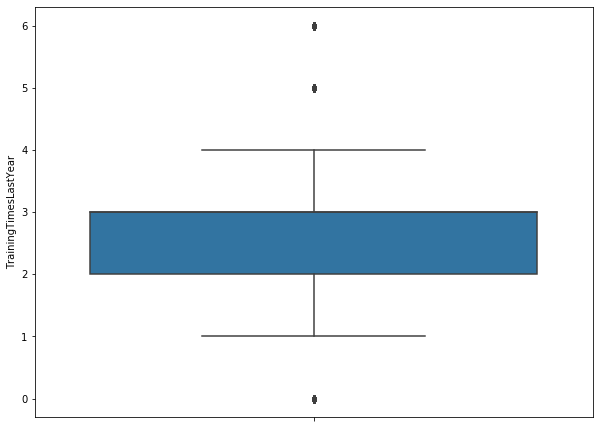

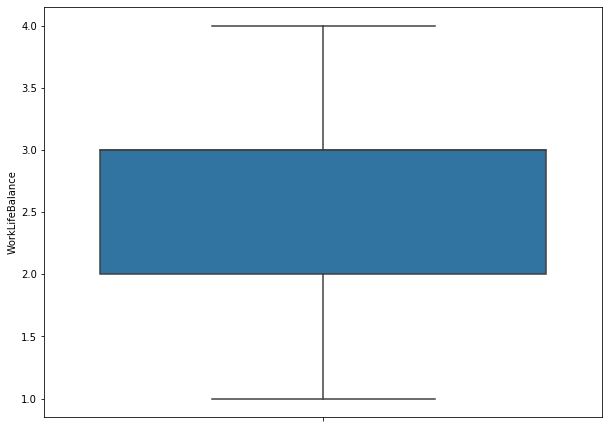

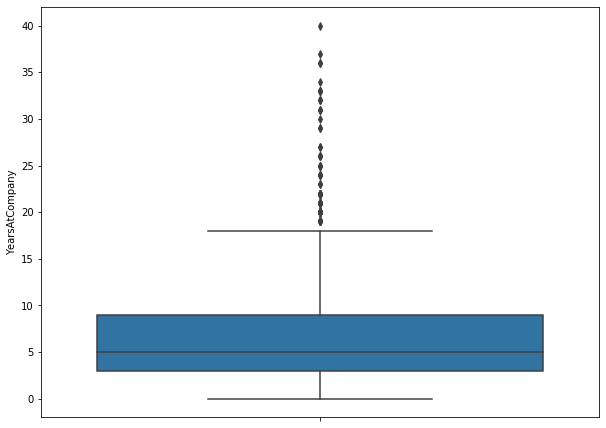

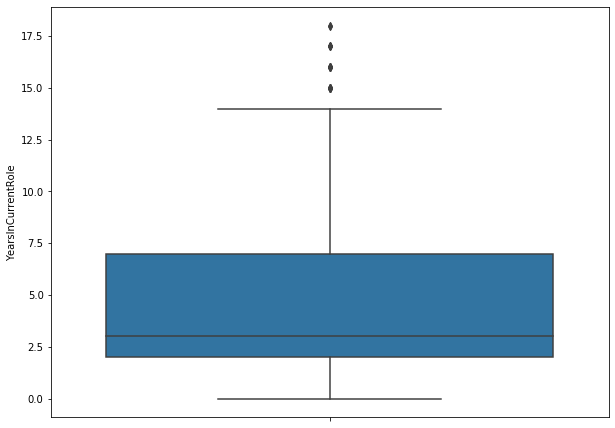

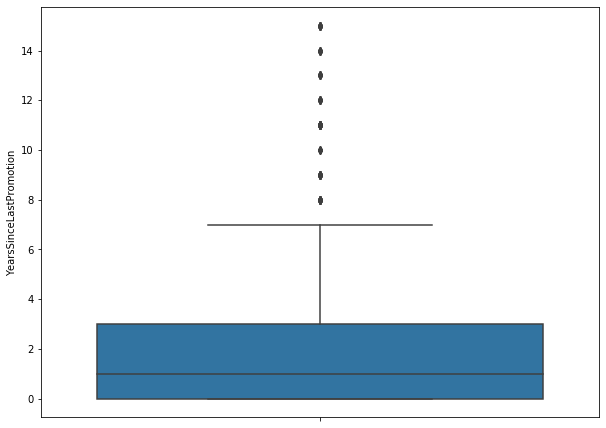

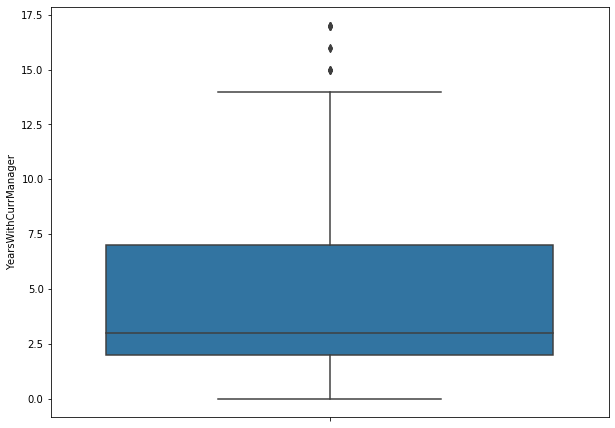

In [18]:
for i in df_int:
    plt.figure(figsize=(10,80))
    plt.subplot(911)
    sns.boxplot(df_int[i],orient='v')

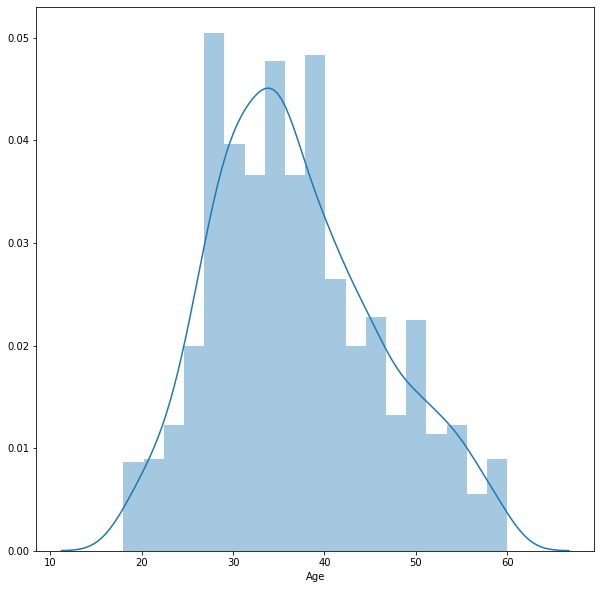

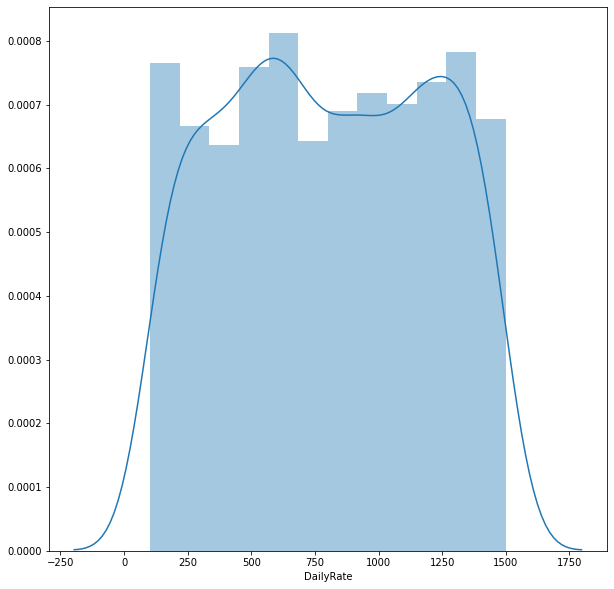

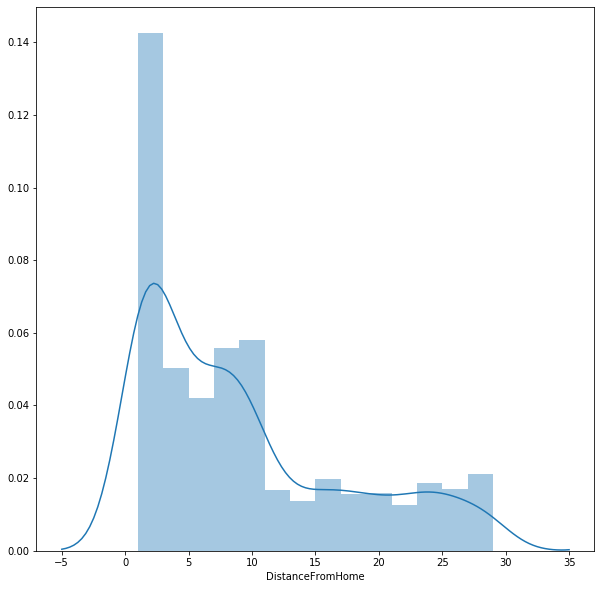

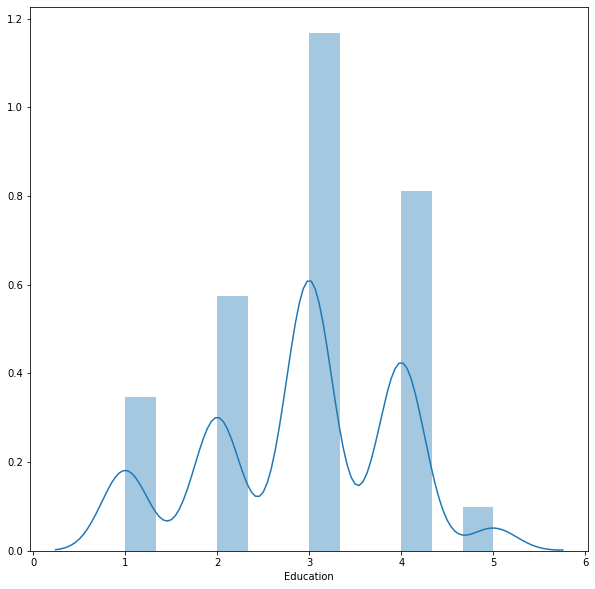

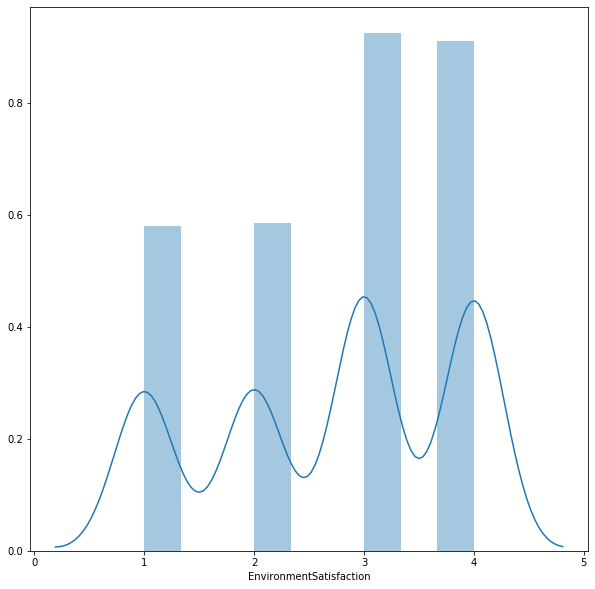

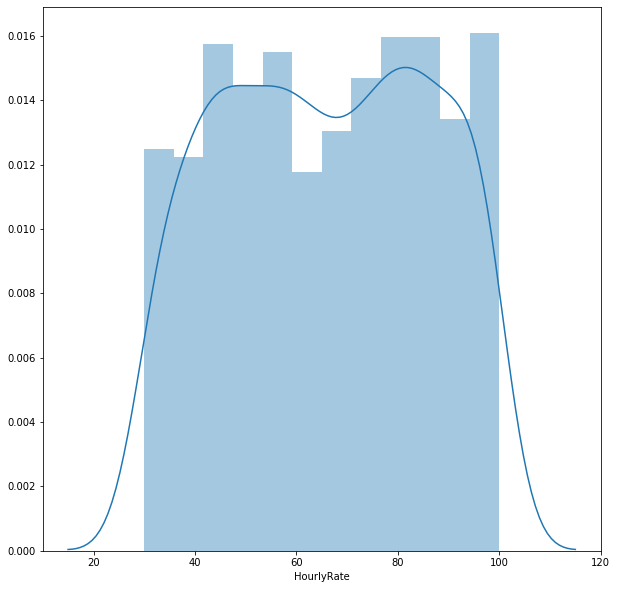

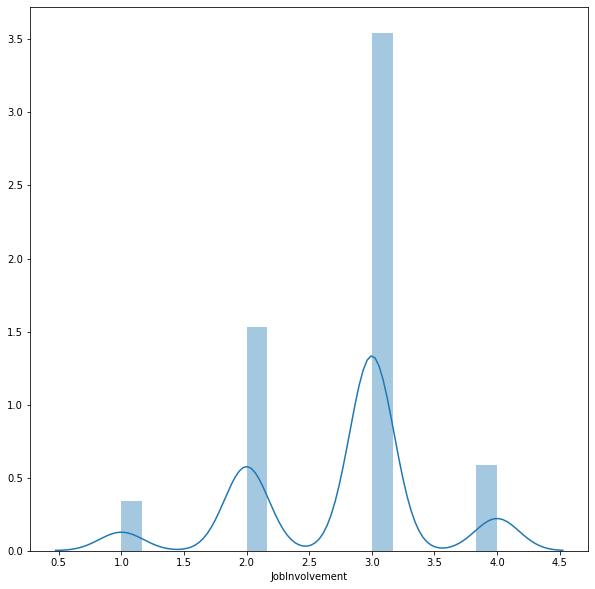

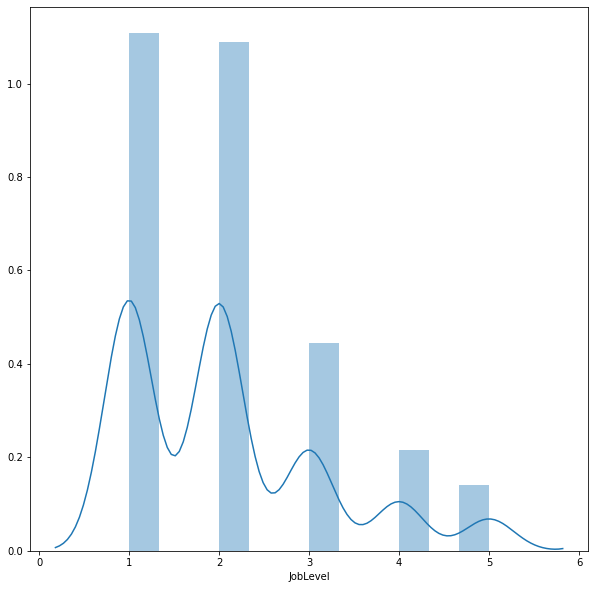

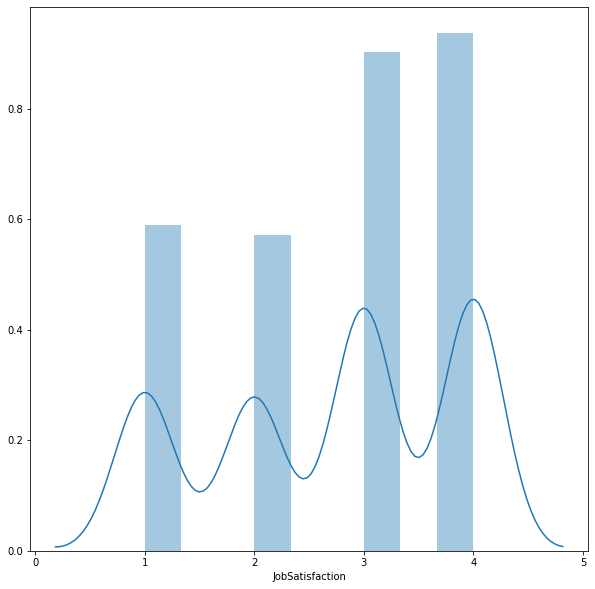

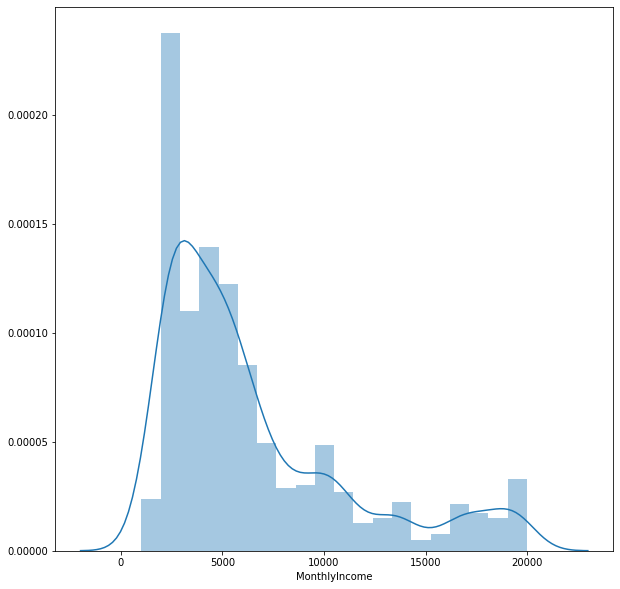

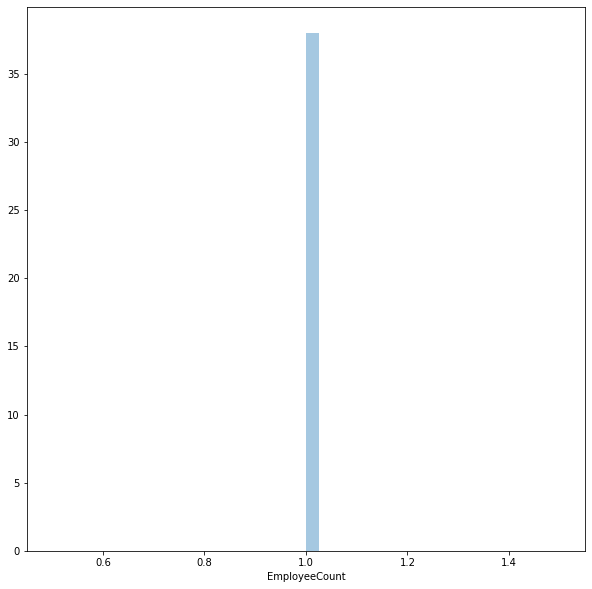

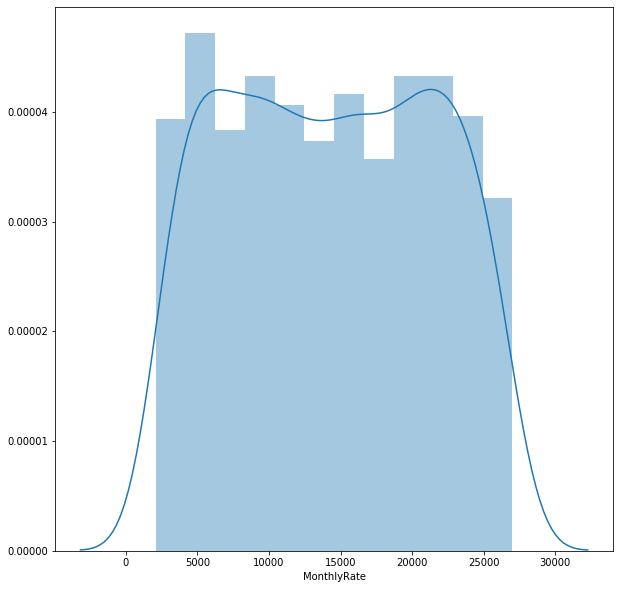

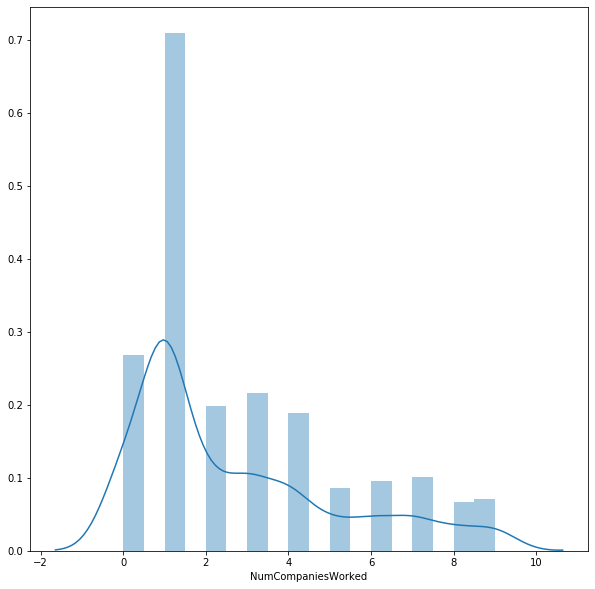

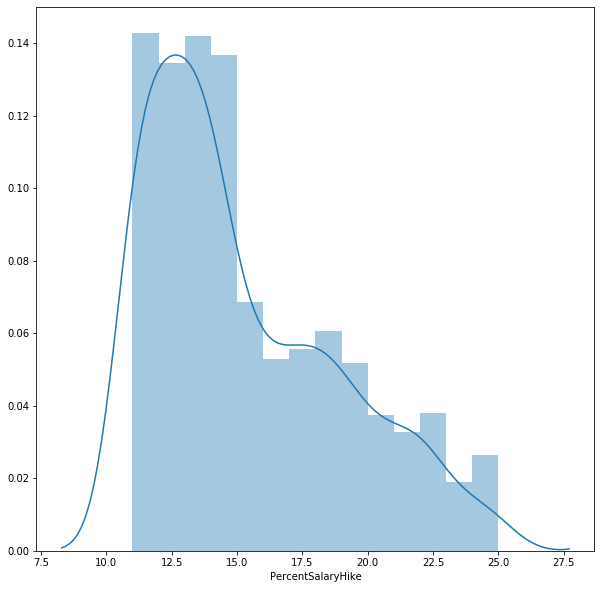

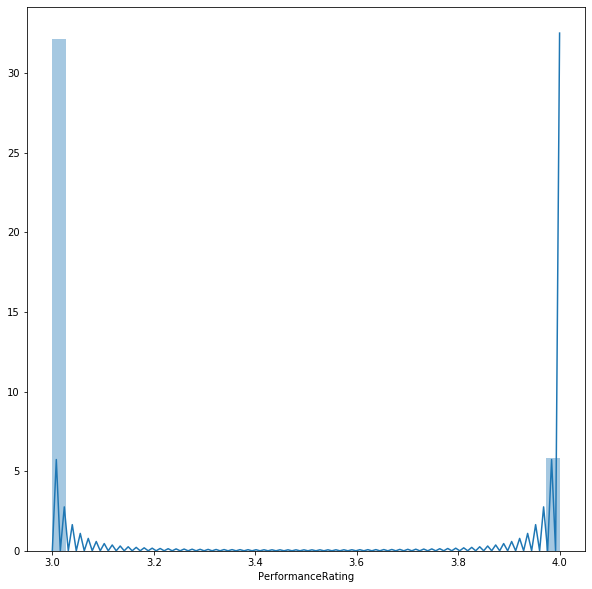

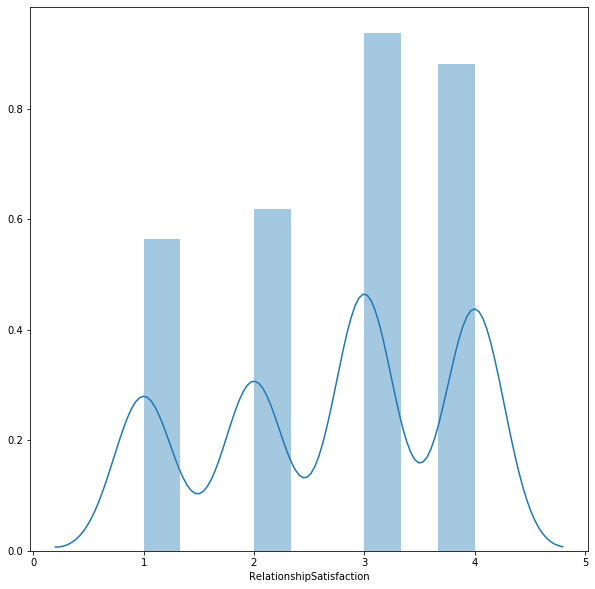

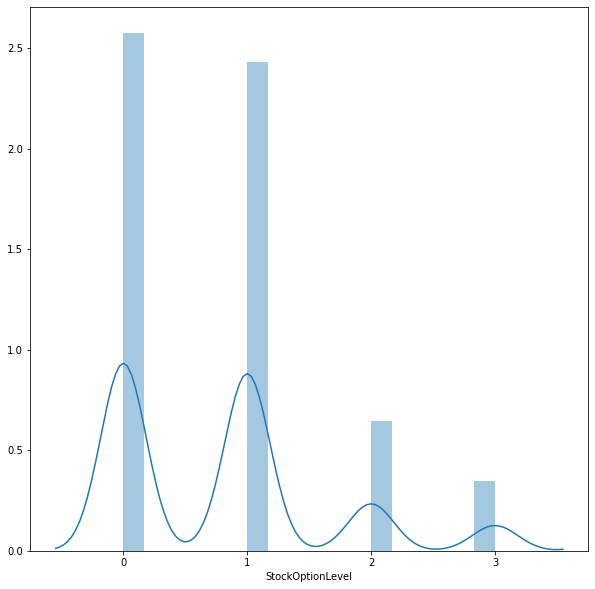

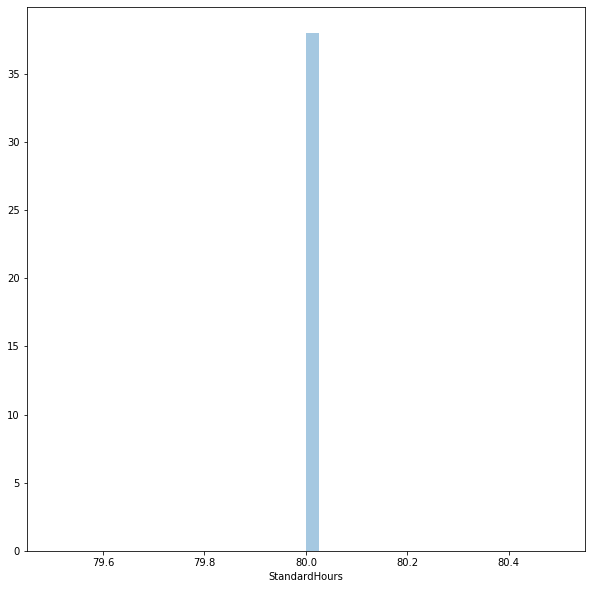

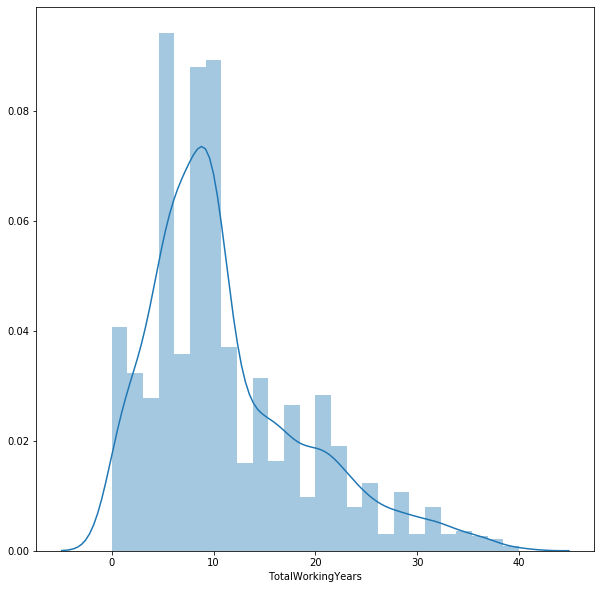

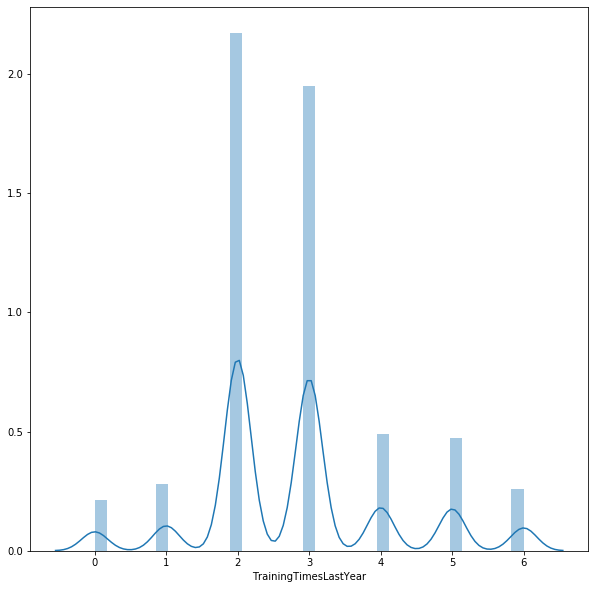

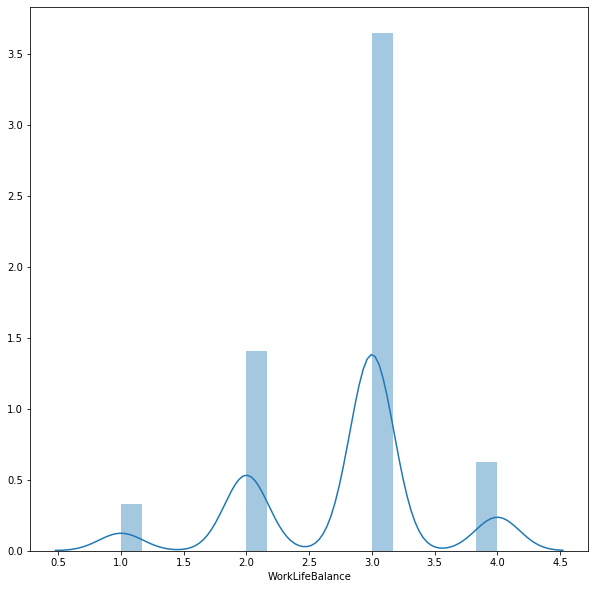

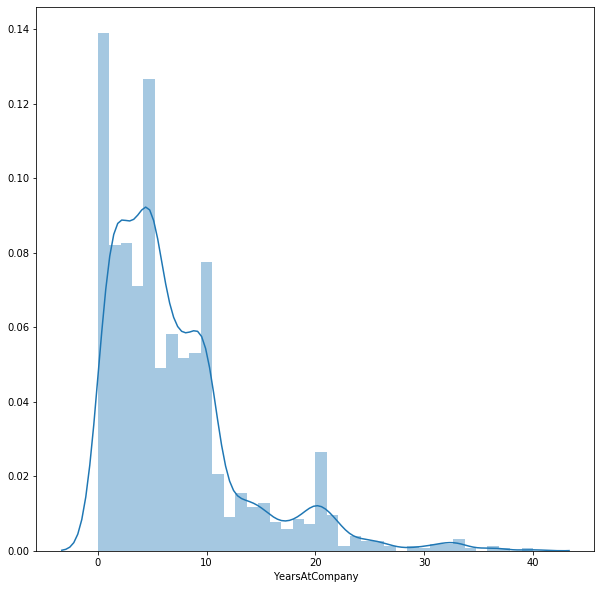

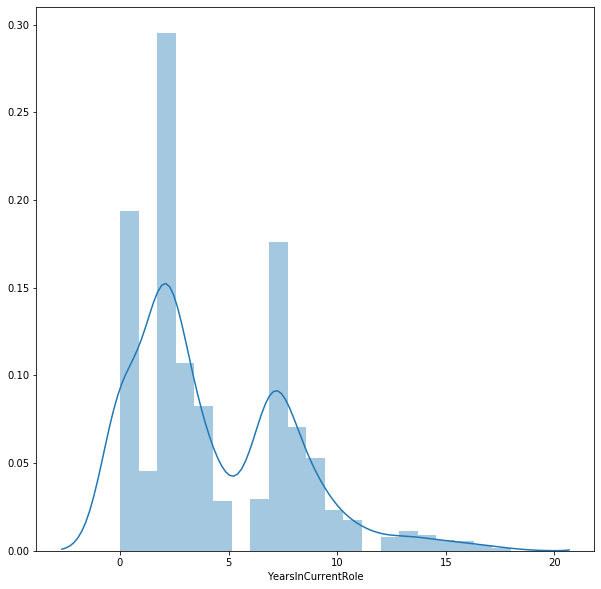

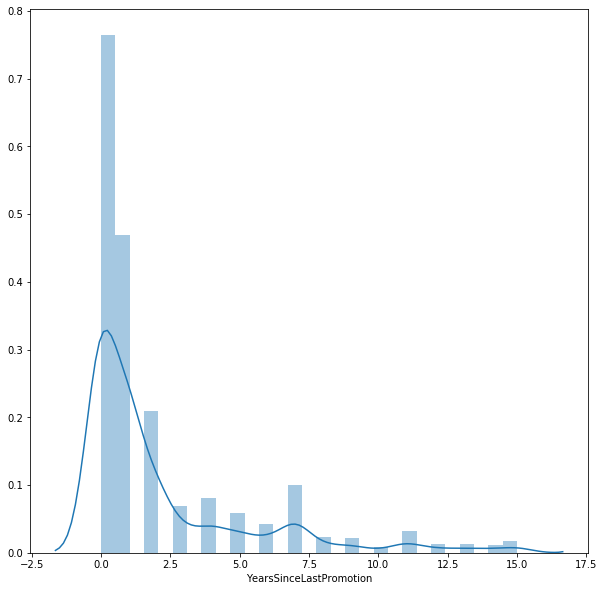

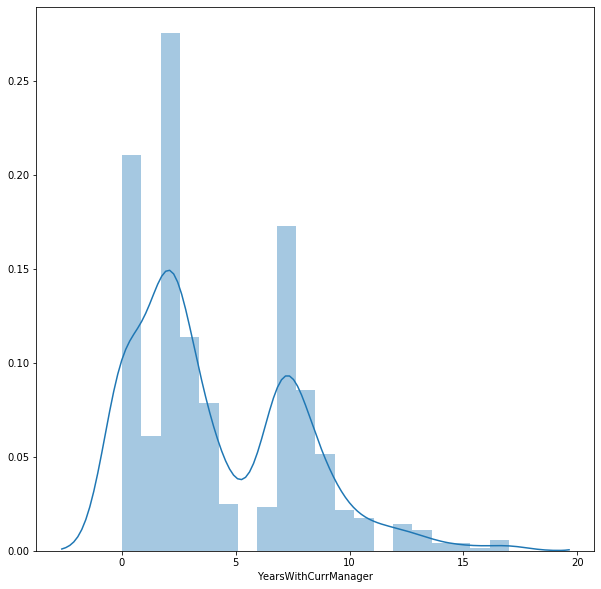

In [19]:
for i in df_int:
    plt.figure(figsize=(10,10))
    sns.distplot(df_int[i])

In [20]:
df_object = df[['Attrition', 'BusinessTravel','Department',
                       'EducationField','Gender','JobRole',
                       'MaritalStatus', 'OverTime']].copy()


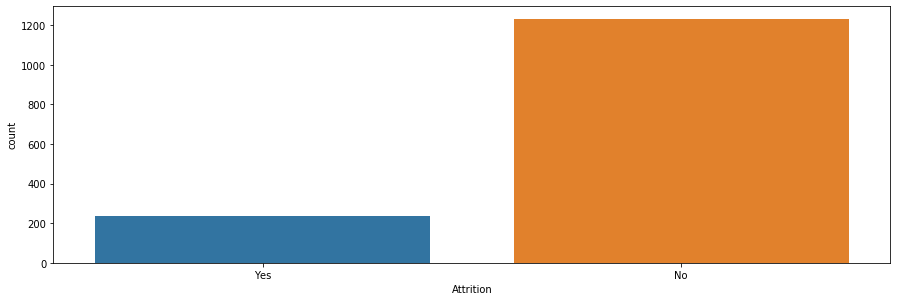

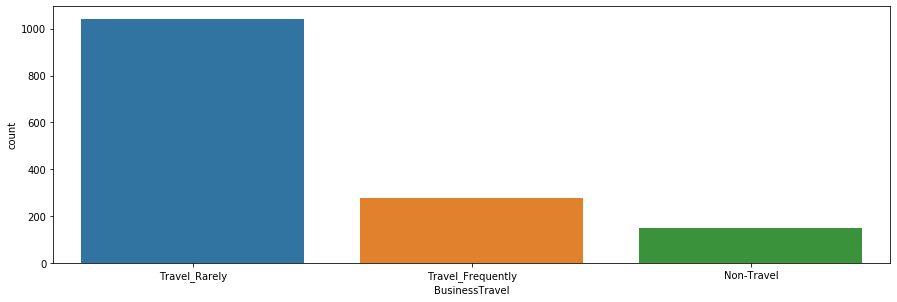

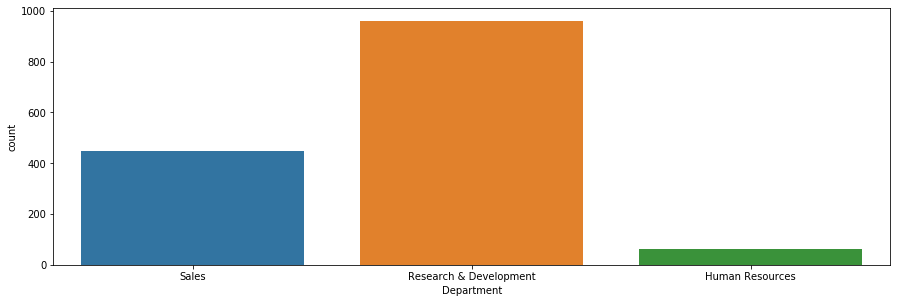

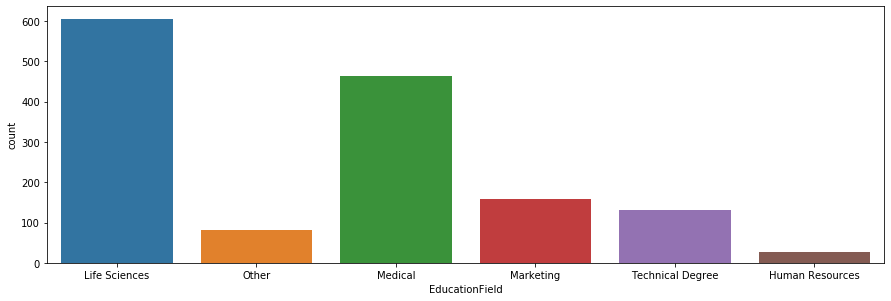

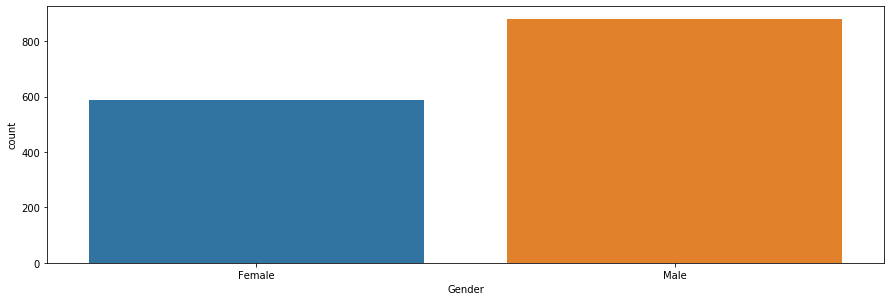

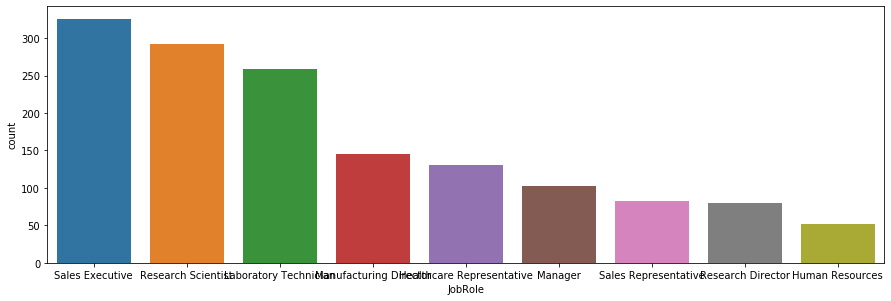

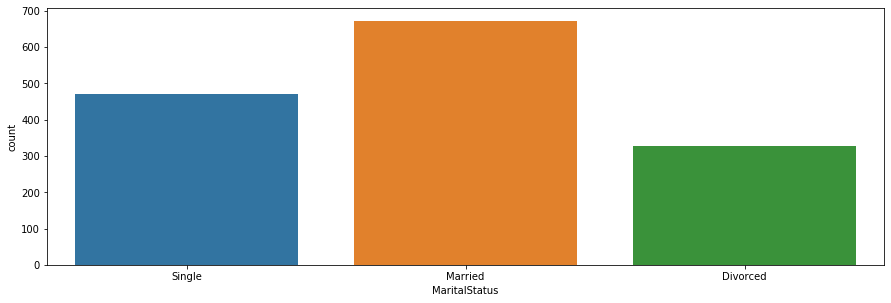

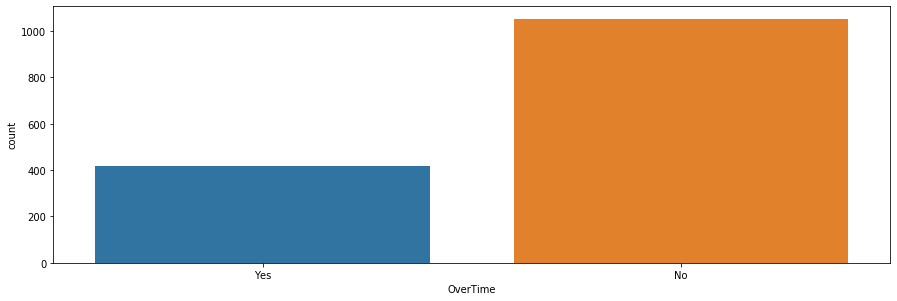

In [21]:
for i in df_object:
    plt.figure(figsize=(15,50))
    plt.subplot(911)
    sns.countplot(df_object[i])

In [22]:
df_int.drop(['StandardHours'],axis=1,inplace=True)
df_int.drop(['EmployeeCount'],axis=1,inplace=True)

In [23]:
df_int.shape

(1470, 23)

In [24]:
le=LabelEncoder()
df_object['Attrition']=le.fit_transform(df_object['Attrition'])
df_object['Gender']=le.fit_transform(df_object['Gender'])
df_object['OverTime']=le.fit_transform(df_object['OverTime'])

In [25]:
df_object= pd.get_dummies(df_object, drop_first=True)

In [26]:
df_object.shape

(1470, 22)

In [27]:
df_final=pd.concat([df_int,df_object],axis=1)
df_final.shape

(1470, 45)

In [28]:
#Separating the variables like indenpendent and the target variable
x=df_final.drop(columns=["Attrition"])
y=df_final[["Attrition"]]

In [29]:
#Scaling the data using Standard Scaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)

In [30]:
#Splitting the data into 2 sets training and the test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=63,stratify=y)

In [31]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1102, 44) (368, 44)
(1102, 1) (368, 1)


In [32]:
KNN=KNeighborsClassifier(n_neighbors=4)
SV=SVC()
LR=LogisticRegression()
DTC=DecisionTreeClassifier(random_state=5)
GNB=GaussianNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()

In [33]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DTC))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


Accuracy_score =  0.8396739130434783


Cross_Val_Score =  0.8476286812392487


roc_auc_score =  0.5205693598815205


classification_report
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       309
           1       0.50      0.05      0.09        59

    accuracy                           0.84       368
   macro avg       0.67      0.52      0.50       368
weighted avg       0.79      0.84      0.78       368



[[306   3]
 [ 56   3]]


F1_score= 0.09230769230769231


Precision_score= 0.5


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr',

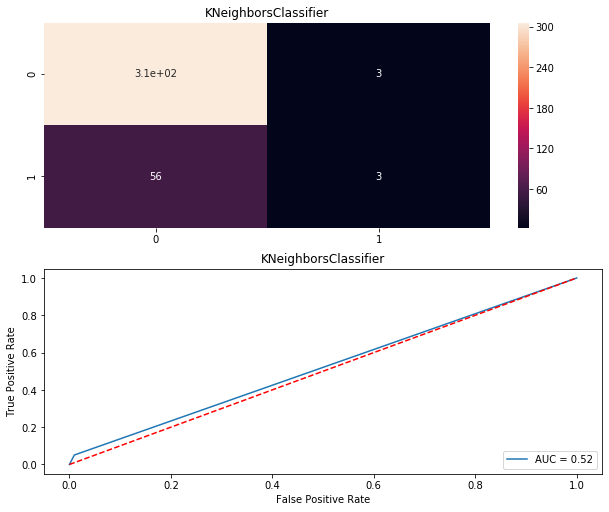

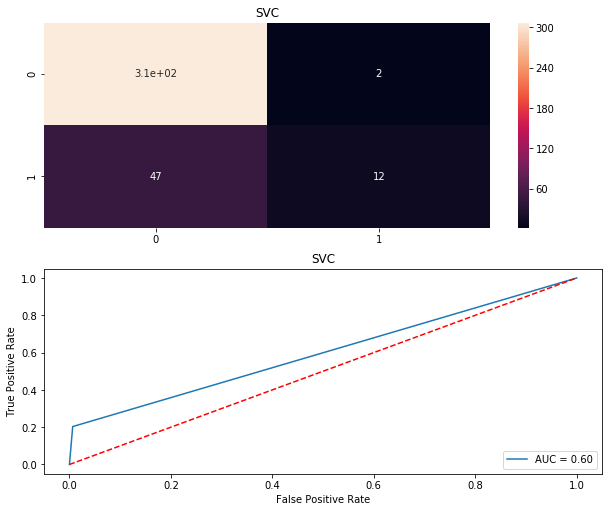

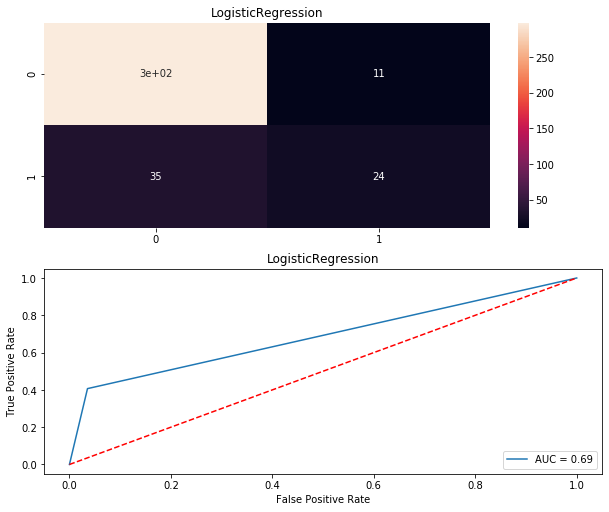

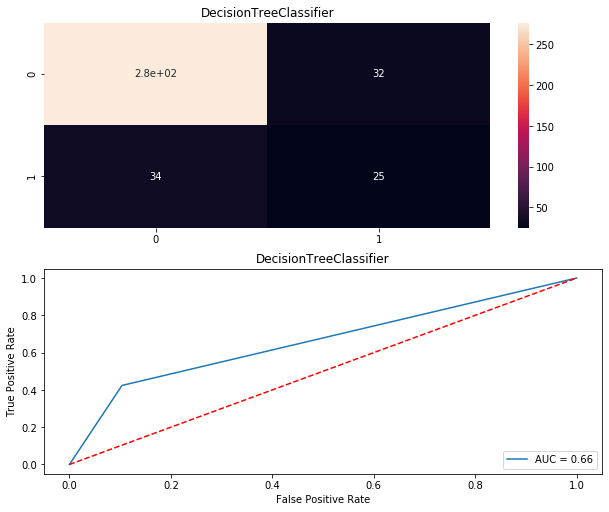

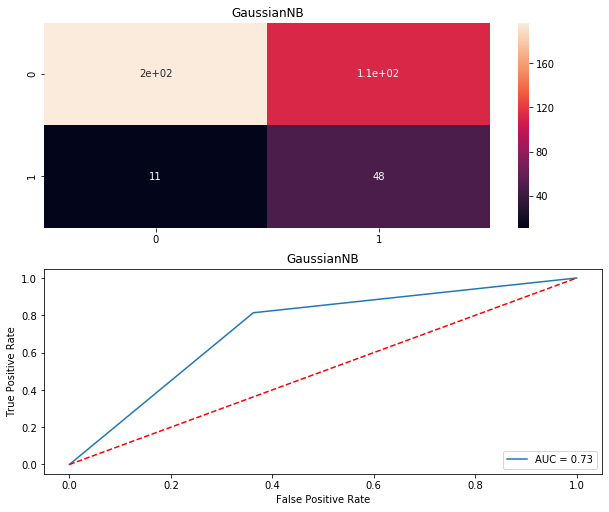

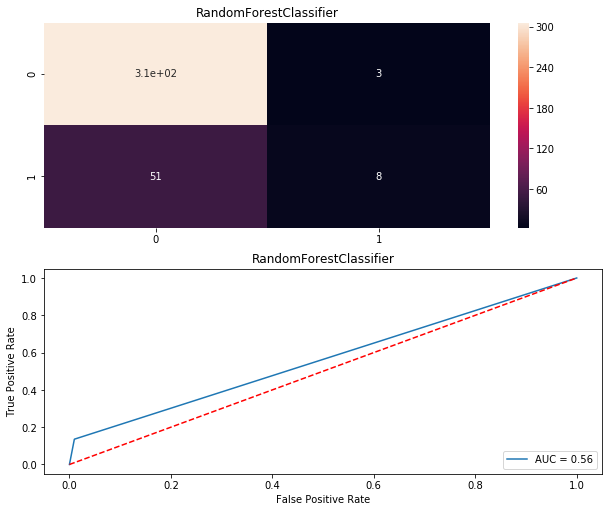

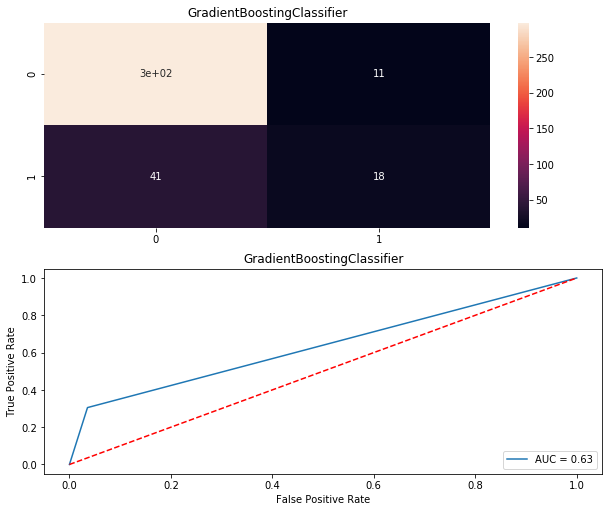

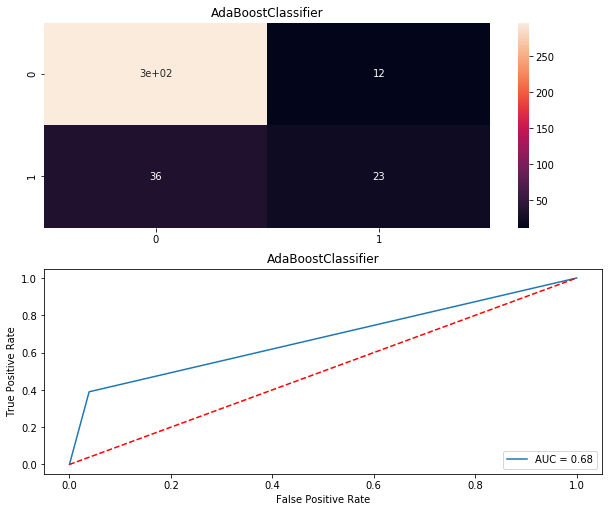

In [34]:
Model = []
score = []
cvs=[]
rocscore=[]
f1score=[]
ps=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    f1s=f1_score(y_test,pred)
    print('F1_score=',f1s)
    f1score.append(f1s*100)
    print('\n')
    precisionscore=precision_score(y_test,pred)
    print('Precision_score=',precisionscore)
    ps.append(precisionscore*100)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [35]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore,'F1_score':f1s,'Precision_score':ps})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve,F1_score,Precision_score
0,KNeighborsClassifier,83.967391,84.762868,52.056936,0.489362,50.000000
1,SVC,86.684783,86.803747,59.845867,0.489362,85.714286
2,LogisticRegression,87.500000,88.366585,68.559048,0.489362,68.571429
3,DecisionTreeClassifier,82.065217,79.870802,66.008447,0.489362,43.859649
4,GaussianNB,66.576087,65.840599,72.554989,0.489362,30.000000
5,RandomForestClassifier,85.326087,85.308981,56.294224,0.489362,72.727273
6,GradientBoostingClassifier,85.869565,86.468227,63.474302,0.489362,62.068966
7,AdaBoostClassifier,86.956522,87.759868,67.549778,0.489362,65.714286


In [36]:
#Lets use GridsearchCV for hyperparamenter tuning for Logistic Regression
def maxacc_score(regr,x,y):
    max_acc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.25,stratify=y)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        acc_scr=accuracy_score(y_test,y_pred)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_acc_score)
    return final_r_state

In [37]:
pipeline=Pipeline([("ss",StandardScaler()),("LR",LogisticRegression())])
parameters = {"LR__max_iter":[10,100,200,300,400,500]}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'LR__max_iter': 10}

In [38]:
pipeline_LR=Pipeline([("ss",StandardScaler()),("LR",LogisticRegression(max_iter=10))])
maxacc_score(pipeline_LR,x,y)

max accuracy score corresponding to  93  is  0.9021739130434783


93

In [39]:
from sklearn.externals import joblib
joblib.dump(LR,"HR_Analytics_LR.pkl")

['HR_Analytics_LR.pkl']